In [1]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import MCS as MCS
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd 
from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

/tmp/ipykernel_106252/894403247.py:17: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS as MCS


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [40]:
cmax_data = pd.read_csv("Cmax_processed.csv.gz")
cmax_data

,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,..."
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...
...,...,...,...,...,...
753,Oc1nc(O)c2cn[nH]c2n1,4.006067,NaN,O=c1[n-]c(=O)c2c[n-]nc2[n-]1,InChI=1S/C5H3N4O2/c10-4-2-1-6-9-3(2)7-5(11)8-4...
754,Oc1ncnc2[nH]ncc12,3.855136,3.868365,O=c1[n-]cnc2[n-]ncc12,InChI=1S/C5H3N4O/c10-5-3-1-8-9-4(3)6-2-7-5/h1-...
755,Sc1ncnc2nc[nH]c12,6.483388,6.553969,S=c1[n-]cnc2[n-]cnc12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=[NH+]2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...


In [4]:
def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))

In [5]:
MorganFingerprint_array = np.stack(cmax_data['Standardized_SMILES'].apply(MorganFingerprint))

Morgan_fingerprint_collection = []
for x in np.arange(MorganFingerprint_array.shape[1]):
    x = "Mfp"+str(x)
    Morgan_fingerprint_collection.append(x)

Morgan_fingerprint_table = pd.DataFrame(MorganFingerprint_array, columns=Morgan_fingerprint_collection)

Morgan_fingerprint_table

,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,Mfp5,Mfp6,Mfp7,Mfp8,Mfp9,...,Mfp2038,Mfp2039,Mfp2040,Mfp2041,Mfp2042,Mfp2043,Mfp2044,Mfp2045,Mfp2046,Mfp2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def MACCSKeysFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMACCSKeysFingerprint(x))

MACCSfingerprint_array = np.stack(cmax_data['Standardized_SMILES'].apply(MACCSKeysFingerprint))

MACCS_collection = []
for x in np.arange(MACCSfingerprint_array.shape[1]):
    x = "MACCS"+str(x)
    MACCS_collection.append(x)

MACCSfingerprint_table = pd.DataFrame(MACCSfingerprint_array, columns=MACCS_collection)

MACCSfingerprint_table

,MACCS0,MACCS1,MACCS2,MACCS3,MACCS4,MACCS5,MACCS6,MACCS7,MACCS8,MACCS9,...,MACCS157,MACCS158,MACCS159,MACCS160,MACCS161,MACCS162,MACCS163,MACCS164,MACCS165,MACCS166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,1,0
754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,0
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
756,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0


In [7]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


INFO: Pandarallel will run on 56 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [8]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

print(len(calc.descriptors))

Ser_Mol = cmax_data['Standardized_SMILES'].apply(Chem.MolFromSmiles)

# as pandas
Mordred_table=  calc.pandas(Ser_Mol)
Mordred_table = Mordred_table.astype('float')
#Mordred_table['smiles_r'] = model_tox_data['smiles_r']
Mordred_table

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/_base/descriptor.py:46: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  dict["since"] = StrictVersion(dict["since"])
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/AdjacencyMatrix.py:10: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _version_remove_SM1_A = StrictVersion("1.1.0")
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/AtomCount.py:20: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _version_add_Nhetero = StrictVersion("1.1.0")
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/DistanceMatrix.py:10: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _version_remove_SM1_D = StrictVersion("1.1.0")
/home/ss2686/miniconda3/envs/my-rdkit

1613


  0%|                                           | 1/758 [00:00<02:50,  4.45it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:87: Dep

  0%|▏                                          | 3/758 [00:00<02:51,  4.39it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:87: Dep

  2%|▋                                         | 13/758 [00:01<00:47, 15.66it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:87: Dep

  4%|█▍                                        | 27/758 [00:01<00:31, 23.19it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:87: Dep

  6%|██▌                                       | 47/758 [00:03<00:52, 13.65it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:87: Dep

 20%|███████▊                                | 149/758 [00:03<00:05, 120.37it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:56: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.float(np.sum(self._each_bond(bond) for bond in self.mol.GetBonds()))
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/mordred/ABCIndex.py:87: Dep

 23%|█████████▎                              | 177/758 [00:04<00:04, 120.37it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 35%|██████████████▍                          | 266/758 [00:06<00:06, 74.36it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 64%|██████████████████████████▍              | 488/758 [00:13<00:06, 39.15it/s]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, ax

100%|█████████████████████████████████████████| 758/758 [00:16<00:00, 45.00it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.815773,6.486587,0.0,0.0,10.261125,2.205946,4.411892,10.261125,1.140125,3.030238,...,8.611958,37.032641,144.034193,8.001900,92.0,10.0,36.0,38.0,5.062500,2.375000
1,8.704061,8.386576,0.0,0.0,14.445285,2.334414,4.668828,14.445285,1.203774,3.376501,...,9.226706,42.499364,167.094629,6.683785,193.0,15.0,56.0,62.0,4.923611,2.833333
2,20.581969,16.521935,0.0,0.0,32.932318,2.649995,5.241759,32.932318,1.317293,4.214960,...,10.782471,77.715417,337.204179,6.484696,1299.0,55.0,154.0,199.0,7.854167,5.145833
3,21.798990,15.716244,0.0,2.0,37.987619,2.405048,4.810097,37.987619,1.356701,4.258800,...,10.058052,62.938211,370.239802,6.383445,2320.0,40.0,142.0,163.0,6.166667,6.333333
4,62.731447,51.791006,0.0,7.0,100.134733,2.444935,4.889759,100.134733,1.178056,5.311883,...,11.208585,125.402718,1208.892303,5.955134,37337.0,150.0,412.0,477.0,43.250000,19.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,8.623181,8.086503,3.0,0.0,13.878163,2.396777,4.704140,13.878163,1.261651,3.352605,...,9.317849,55.364239,149.011596,12.417633,138.0,14.0,58.0,68.0,3.694444,2.388889
754,7.806684,7.343579,2.0,0.0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,134.023958,11.168663,105.0,12.0,52.0,61.0,2.833333,2.222222
755,7.806684,7.343579,2.0,0.0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,150.001114,12.500093,105.0,12.0,52.0,61.0,2.833333,2.222222
756,11.232828,9.780073,0.0,2.0,18.854771,2.430511,4.661105,18.854771,1.346769,3.611615,...,9.490469,61.719596,205.079396,7.595533,298.0,17.0,76.0,90.0,2.944444,3.055556


In [9]:
Mordred_table 

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,5.815773,6.486587,0.0,0.0,10.261125,2.205946,4.411892,10.261125,1.140125,3.030238,...,8.611958,37.032641,144.034193,8.001900,92.0,10.0,36.0,38.0,5.062500,2.375000
1,8.704061,8.386576,0.0,0.0,14.445285,2.334414,4.668828,14.445285,1.203774,3.376501,...,9.226706,42.499364,167.094629,6.683785,193.0,15.0,56.0,62.0,4.923611,2.833333
2,20.581969,16.521935,0.0,0.0,32.932318,2.649995,5.241759,32.932318,1.317293,4.214960,...,10.782471,77.715417,337.204179,6.484696,1299.0,55.0,154.0,199.0,7.854167,5.145833
3,21.798990,15.716244,0.0,2.0,37.987619,2.405048,4.810097,37.987619,1.356701,4.258800,...,10.058052,62.938211,370.239802,6.383445,2320.0,40.0,142.0,163.0,6.166667,6.333333
4,62.731447,51.791006,0.0,7.0,100.134733,2.444935,4.889759,100.134733,1.178056,5.311883,...,11.208585,125.402718,1208.892303,5.955134,37337.0,150.0,412.0,477.0,43.250000,19.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,8.623181,8.086503,3.0,0.0,13.878163,2.396777,4.704140,13.878163,1.261651,3.352605,...,9.317849,55.364239,149.011596,12.417633,138.0,14.0,58.0,68.0,3.694444,2.388889
754,7.806684,7.343579,2.0,0.0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,134.023958,11.168663,105.0,12.0,52.0,61.0,2.833333,2.222222
755,7.806684,7.343579,2.0,0.0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,150.001114,12.500093,105.0,12.0,52.0,61.0,2.833333,2.222222
756,11.232828,9.780073,0.0,2.0,18.854771,2.430511,4.661105,18.854771,1.346769,3.611615,...,9.490469,61.719596,205.079396,7.595533,298.0,17.0,76.0,90.0,2.944444,3.055556


In [10]:
def get_num_charged_atoms_neg(mol):
    mol_h = Chem.AddHs(mol)
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol_h)
     
    positive = 0
    negative = 0
     
    for atom in mol_h.GetAtoms():
        if float(atom.GetProp('_GasteigerCharge')) <= 0:
            negative += 1
     
    return negative

def get_num_charged_atoms_pos(mol):
    mol_h = Chem.AddHs(mol)
    Chem.rdPartialCharges.ComputeGasteigerCharges(mol_h)
     
    positive = 0
    negative = 0
     
    for atom in mol_h.GetAtoms():
        if float(atom.GetProp('_GasteigerCharge')) >= 0:
            positive += 1
    return positive

def get_assembled_ring(mol):
    ring_info = mol.GetRingInfo()
    num_ring = ring_info.NumRings()
    ring_atoms = ring_info.AtomRings()
    num_assembled = 0
     
    for i in range(num_ring):
        for j in range(i+1, num_ring):
            x = set(ring_atoms[i])
            y = set(ring_atoms[j])
            if not x.intersection(y): # 2つの環が縮環でない場合に
                for x_id in x:
                    x_atom = mol.GetAtomWithIdx(x_id)
                    neighbors = [k.GetIdx() for k in x_atom.GetNeighbors()]
                    for x_n in neighbors:
                        if x_n in y: # 環同士を繋ぐ結合があるか否か
                            num_assembled += 1
     
    return num_assembled

def get_num_stereocenters(mol):
    return AllChem.CalcNumAtomStereoCenters(mol) + AllChem.CalcNumUnspecifiedAtomStereoCenters(mol)

def calc_descriptors(dataframe):
    mols = dataframe.Standardized_SMILES.apply(Chem.MolFromSmiles)
    descr = []
    for m in mols:
        descr.append([ Descriptors.TPSA(m),
               Descriptors.NumRotatableBonds(m),
               AllChem.CalcNumRings(m),
               Descriptors.NumAromaticRings(m),
               Descriptors.NumHAcceptors(m),
               Descriptors.NumHDonors(m),
               Descriptors.FractionCSP3(m),
               Descriptors.MolLogP(m) ,
               Descriptors.NHOHCount(m),
               Descriptors.NOCount(m),
               Descriptors.NumHeteroatoms(m),
               get_num_charged_atoms_pos(m),
               get_num_charged_atoms_neg(m),
               get_assembled_ring(m),
               get_num_stereocenters(m)])
    descr = np.asarray(descr)
    return(descr)

descs = [ 'PSA', 'n_rot_bonds', 'n_rings', 'n_ar_rings',
         'n_HBA', 'n_HBD', 'Fsp3', 'logP', 'NHOHCount', 'NOCount', 'NumHeteroatoms',
        'n_positive', '_n_negative', 'n_ring_asmbl', 'n_stereo']
a=calc_descriptors(cmax_data)
descdf=pd.DataFrame(a, columns=descs)
descdf_approved=descdf.reset_index(drop=True)
descdf_approved

,PSA,n_rot_bonds,n_rings,n_ar_rings,n_HBA,n_HBD,Fsp3,logP,NHOHCount,NOCount,NumHeteroatoms,n_positive,_n_negative,n_ring_asmbl,n_stereo
0,20.23,2.0,0.0,0.0,1.0,1.0,0.428571,1.51320,1.0,1.0,2.0,11.0,7.0,0.0,2.0
1,52.32,1.0,1.0,0.0,2.0,1.0,0.666667,1.41780,2.0,3.0,3.0,15.0,10.0,0.0,0.0
2,46.26,0.0,5.0,1.0,3.0,1.0,0.681818,4.22100,1.0,3.0,3.0,32.0,20.0,2.0,12.0
3,8.88,6.0,4.0,3.0,0.0,2.0,0.230769,2.27280,2.0,2.0,2.0,38.0,20.0,0.0,0.0
4,287.20,15.0,1.0,0.0,12.0,12.0,0.790323,-6.65070,12.0,23.0,23.0,153.0,50.0,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,89.33,0.0,2.0,2.0,3.0,0.0,0.000000,-2.17320,0.0,6.0,6.0,2.0,10.0,0.0,0.0
754,71.05,0.0,2.0,2.0,3.0,0.0,0.000000,-1.09560,0.0,5.0,5.0,5.0,7.0,0.0,0.0
755,53.98,0.0,2.0,2.0,3.0,0.0,0.000000,0.27369,0.0,4.0,5.0,5.0,7.0,0.0,0.0
756,17.21,1.0,3.0,1.0,2.0,1.0,0.363636,0.22670,1.0,2.0,3.0,19.0,8.0,1.0,2.0


In [41]:
train_data= pd.concat([cmax_data, Morgan_fingerprint_table, MACCSfingerprint_table, descdf_approved, Mordred_table], axis=1)
train_data

,SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,Standardized_SMILES,Standardized_InChI,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C#CC(O)(/C=C/Cl)CC,4.257078,NaN,C#CC(O)(C=CCl)CC,"InChI=1S/C7H9ClO/c1-3-7(9,4-2)5-6-8/h1,5-6,9H,...",0,0,0,0,0,...,8.611958,37.032641,144.034193,8.001900,92.0,10.0,36.0,38.0,5.062500,2.375000
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,C#CC1(OC(N)=O)CCCCC1,InChI=1S/C9H13NO2/c1-2-9(12-8(10)11)6-4-3-5-7-...,0,0,1,0,0,...,9.226706,42.499364,167.094629,6.683785,193.0,15.0,56.0,62.0,4.923611,2.833333
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,6.227192,NaN,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,InChI=1S/C22H27NO2/c1-4-22(24)10-8-18-16-6-5-1...,0,0,0,0,0,...,10.782471,77.715417,337.204179,6.484696,1299.0,55.0,154.0,199.0,7.854167,5.145833
3,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,6.047947,NaN,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,InChI=1S/C26H28N2/c1-4-11-23(12-5-1)13-10-18-2...,0,1,0,0,0,...,10.058052,62.938211,370.239802,6.383445,2320.0,40.0,142.0,163.0,6.166667,6.333333
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,6.111649,7.279140,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75...,0,1,0,0,0,...,11.208585,125.402718,1208.892303,5.955134,37337.0,150.0,412.0,477.0,43.250000,19.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,Oc1nc(O)c2cn[nH]c2n1,4.006067,NaN,O=c1[n-]c(=O)c2c[n-]nc2[n-]1,InChI=1S/C5H3N4O2/c10-4-2-1-6-9-3(2)7-5(11)8-4...,0,0,0,0,0,...,9.317849,55.364239,149.011596,12.417633,138.0,14.0,58.0,68.0,3.694444,2.388889
754,Oc1ncnc2[nH]ncc12,3.855136,3.868365,O=c1[n-]cnc2[n-]ncc12,InChI=1S/C5H3N4O/c10-5-3-1-8-9-4(3)6-2-7-5/h1-...,0,0,0,0,0,...,9.161465,53.745115,134.023958,11.168663,105.0,12.0,52.0,61.0,2.833333,2.222222
755,Sc1ncnc2nc[nH]c12,6.483388,6.553969,S=c1[n-]cnc2[n-]cnc12,InChI=1S/C5H3N4S/c10-5-3-4(7-1-6-3)8-2-9-5/h1-...,0,0,0,0,0,...,9.161465,53.745115,150.001114,12.500093,105.0,12.0,52.0,61.0,2.833333,2.222222
756,c1ccc([C@H]2CN3CCSC3=N2)cc1,5.459929,NaN,c1ccc(C2CN3CCSC3=[NH+]2)cc1,InChI=1S/C11H12N2S/c1-2-4-9(5-3-1)10-8-13-6-7-...,0,0,0,0,0,...,9.490469,61.719596,205.079396,7.595533,298.0,17.0,76.0,90.0,2.944444,3.055556


In [42]:
mfp_features = train_data.columns[5:2053]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2054:2220]
physicochemical_features= train_data.columns[2220:2235]
mordred_features= train_data.columns[2235:]
identifiers = train_data.columns[:5]

In [43]:
mordred_features

Index(['ABC', 'ABCGG', 'nAcid', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A',
       'SpAD_A', 'SpMAD_A', 'LogEE_A',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1613)

In [44]:
identifiers

Index(['SMILES', 'median pMolar total plasma concentration',
       'median pMolar unbound plasma concentration', 'Standardized_SMILES',
       'Standardized_InChI'],
      dtype='object')

In [45]:
len(maccs_features)

166

In [46]:
len(mfp_features)

2048

In [47]:
len(physicochemical_features)

15

In [48]:
len(mordred_features)

1613

In [49]:
identifiers

Index(['SMILES', 'median pMolar total plasma concentration',
       'median pMolar unbound plasma concentration', 'Standardized_SMILES',
       'Standardized_InChI'],
      dtype='object')

In [50]:
file = open("features_morgan_mordred_maccs_physc.txt", "r")
file_lines = file.read()
all_features = file_lines.split("\n")
all_features = all_features[:-1]
len(all_features)

554

In [51]:
len(all_features)

554

In [52]:
all_features

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBondsS',
 'nBondsD',
 'nBondsA',
 'nBondsM',
 'nBondsKS',
 'nBondsKD',
 'C1SP2',
 'C2SP2',
 'C3SP2',
 'C1SP3',
 'C2SP3',


In [53]:
all_features = ["Standardized_SMILES", "median pMolar total plasma concentration", 
                "median pMolar unbound plasma concentration"] +all_features

In [54]:
all_features

['Standardized_SMILES',
 'median pMolar total plasma concentration',
 'median pMolar unbound plasma concentration',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'AATS0dv',
 'AATS0d',
 'AATS0Z',
 'ATSC0dv',
 'ATSC1dv',
 'ATSC2dv',
 'ATSC3dv',
 'ATSC4dv',
 'ATSC5dv',
 'ATSC6dv',
 'ATSC7dv',
 'ATSC8dv',
 'ATSC0d',
 'ATSC1d',
 'ATSC2d',
 'ATSC3d',
 'ATSC4d',
 'ATSC5d',
 'ATSC6d',
 'ATSC7d',
 'ATSC8d',
 'ATSC0Z',
 'ATSC1Z',
 'ATSC2Z',
 'ATSC3Z',
 'ATSC4Z',
 'ATSC5Z',
 'ATSC6Z',
 'ATSC7Z',
 'ATSC8Z',
 'AATSC0dv',
 'AATSC0Z',
 'BalabanJ',
 'BertzCT',
 'nBonds',
 'nBondsO',
 'nBonds

In [55]:
train_data = train_data[all_features]
train_data

,Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,...,n_HBD,Fsp3,logP,NHOHCount,NOCount,NumHeteroatoms,n_positive,_n_negative,n_ring_asmbl,n_stereo
0,C#CC(O)(C=CCl)CC,4.257078,NaN,5.815773,6.486587,0.0,0.0,0.0,0.0,18.0,...,1.0,0.428571,1.51320,1.0,1.0,2.0,11.0,7.0,0.0,2.0
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,8.704061,8.386576,0.0,0.0,0.0,0.0,25.0,...,1.0,0.666667,1.41780,2.0,3.0,3.0,15.0,10.0,0.0,0.0
2,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN,20.581969,16.521935,0.0,0.0,5.0,5.0,52.0,...,1.0,0.681818,4.22100,1.0,3.0,3.0,32.0,20.0,2.0,12.0
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN,21.798990,15.716244,0.0,2.0,18.0,18.0,58.0,...,2.0,0.230769,2.27280,2.0,2.0,2.0,38.0,20.0,0.0,0.0
4,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,6.111649,7.279140,62.731447,51.791006,0.0,7.0,0.0,0.0,203.0,...,12.0,0.790323,-6.65070,12.0,23.0,23.0,153.0,50.0,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,O=c1[n-]c(=O)c2c[n-]nc2[n-]1,4.006067,NaN,8.623181,8.086503,3.0,0.0,9.0,10.0,12.0,...,0.0,0.000000,-2.17320,0.0,6.0,6.0,2.0,10.0,0.0,0.0
754,O=c1[n-]cnc2[n-]ncc12,3.855136,3.868365,7.806684,7.343579,2.0,0.0,9.0,10.0,12.0,...,0.0,0.000000,-1.09560,0.0,5.0,5.0,5.0,7.0,0.0,0.0
755,S=c1[n-]cnc2[n-]cnc12,6.483388,6.553969,7.806684,7.343579,2.0,0.0,9.0,10.0,12.0,...,0.0,0.000000,0.27369,0.0,4.0,5.0,5.0,7.0,0.0,0.0
756,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN,11.232828,9.780073,0.0,2.0,6.0,6.0,27.0,...,1.0,0.363636,0.22670,1.0,2.0,3.0,19.0,8.0,1.0,2.0


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, ShuffleSplit 
from scipy.stats import randint
from numpy import argmax
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict


In [69]:
df_subset

,Standardized_SMILES,median pMolar total plasma concentration,median pMolar unbound plasma concentration,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,...,n_HBD,Fsp3,logP,NHOHCount,NOCount,NumHeteroatoms,n_positive,_n_negative,n_ring_asmbl,n_stereo
0,C#CC(O)(C=CCl)CC,4.257078,NaN,5.815773,6.486587,0.0,0.0,0.0,0.0,18.0,...,1.0,0.428571,1.51320,1.0,1.0,2.0,11.0,7.0,0.0,2.0
1,C#CC1(OC(N)=O)CCCCC1,4.223262,NaN,8.704061,8.386576,0.0,0.0,0.0,0.0,25.0,...,1.0,0.666667,1.41780,2.0,3.0,3.0,15.0,10.0,0.0,0.0
2,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,6.227192,NaN,20.581969,16.521935,0.0,0.0,5.0,5.0,52.0,...,1.0,0.681818,4.22100,1.0,3.0,3.0,32.0,20.0,2.0,12.0
3,C(=Cc1ccccc1)C[NH+]1CC[NH+](C(c2ccccc2)c2ccccc...,6.047947,NaN,21.798990,15.716244,0.0,2.0,18.0,18.0,58.0,...,2.0,0.230769,2.27280,2.0,2.0,2.0,38.0,20.0,0.0,0.0
4,CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)[NH+](C)CC(=O)[...,6.111649,7.279140,62.731447,51.791006,0.0,7.0,0.0,0.0,203.0,...,12.0,0.790323,-6.65070,12.0,23.0,23.0,153.0,50.0,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,O=c1[n-]c(=O)c2c[n-]nc2[n-]1,4.006067,NaN,8.623181,8.086503,3.0,0.0,9.0,10.0,12.0,...,0.0,0.000000,-2.17320,0.0,6.0,6.0,2.0,10.0,0.0,0.0
745,O=c1[n-]cnc2[n-]ncc12,3.855136,3.868365,7.806684,7.343579,2.0,0.0,9.0,10.0,12.0,...,0.0,0.000000,-1.09560,0.0,5.0,5.0,5.0,7.0,0.0,0.0
746,S=c1[n-]cnc2[n-]cnc12,6.483388,6.553969,7.806684,7.343579,2.0,0.0,9.0,10.0,12.0,...,0.0,0.000000,0.27369,0.0,4.0,5.0,5.0,7.0,0.0,0.0
747,c1ccc(C2CN3CCSC3=[NH+]2)cc1,5.459929,NaN,11.232828,9.780073,0.0,2.0,6.0,6.0,27.0,...,1.0,0.363636,0.22670,1.0,2.0,3.0,19.0,8.0,1.0,2.0


554
453
554
81
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 453
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 45
n_resources: 10
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 1
n_candidates: 15
n_resources: 30
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 2
n_candidates: 5
n_resources: 90
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 3
n_candidates: 2
n_resources: 270
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mean Squared Error (MSE): 0.9249838063434687
Mean Absolute Error (MAE): 0.7622897129738045
R^2 Score: 0.4917563908994447


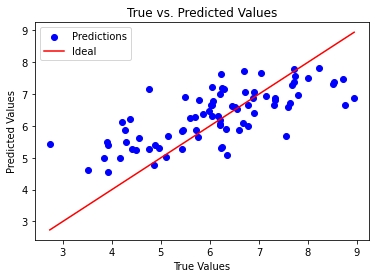

554
636
554
113
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 636
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 10
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 1
n_candidates: 21
n_resources: 30
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 90
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 270
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean Squared Error (MSE): 0.9189691926780518
Mean Absolute Error (MAE): 0.7653907890769771
R^2 Score: 0.4305521335001824


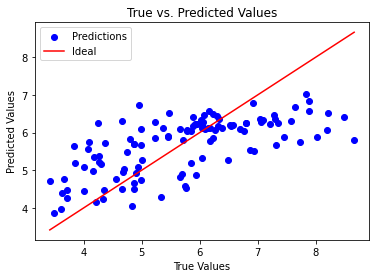

In [88]:
#built on individual Cmax model, Predict held-out test set 
import pickle
    
for column in ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration"]:
    
    df_subset = train_data.dropna(subset=[column]).reset_index(drop=True)
    
    y = np.array(df_subset[column])
    features= df_subset.drop(["median pMolar total plasma concentration", 
                "median pMolar unbound plasma concentration", "Standardized_SMILES"] , axis = 1)

    feature_list = list(features.columns)
    X = np.array(features)
    
    # Split the data into training and test sets with 20% of data being used for testing.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    print(len(X_train[0]))
    print(len(y_train))
    print(len(X_test[0]))
    print(len(y_test))

    
    # Create the random forest regressor
    rf = RandomForestRegressor(random_state=42)

    # Update the hyperparameter grid
    param_dist_grid = { 
        'max_depth': randint(5, 20),
        'max_features': randint(30, 50),
        'min_samples_leaf': randint(5, 15),
        'min_samples_split': randint(5, 15),
        'n_estimators': [200, 300, 400, 500, 600],
        'bootstrap': [True, False],
        'random_state': [42],
        'criterion': ['squared_error', 'absolute_error'],
        'n_jobs': [30]
    }

    # Using KFold instead of StratifiedKFold for regression
    inner_cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=42)

    # HalvingRandomSearchCV setup
    rsh = HalvingRandomSearchCV(estimator=rf, param_distributions=param_dist_grid,
                                factor=3, random_state=42, n_jobs=30, verbose=1,
                                cv=inner_cv, min_resources="smallest")

    # Fit the model
    rsh.fit(X_train, y_train)

    # Get the best estimator
    regressor = rsh.best_estimator_
    regressor.fit(X_train, y_train)
    
    


    # Predict on the held-out test set and NCV compounds
    y_pred = regressor.predict(X_test)
    
    # Evaluation metrics for the held-out test set
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R^2 Score:", r2)

    # If you want to visualize the true values vs. the predicted values
    import matplotlib.pyplot as plt

    plt.scatter(y_test, y_pred, color='blue', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.title("True vs. Predicted Values")
    plt.show()
    
    regressor.fit(X, y)
    pickle.dump(regressor, open(f"bestlivmodel_{column}_model.sav",  'wb'))
